# Abnormality detection in bone X-Ray Radiographs

<font color = 'teal'>Data Wrangling <font />


Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from keras.preprocessing import image


Dataset used in this project is called MURA. MURA is one of the largest public radiographic image datasets. MURA is a dataset of musculoskeletal radiographs consisting of 14,863 studies from 12,173 patients, with a total of 40,561 multi-view radiographic images.

In [2]:
#load the train image data into a pandas dataframe
train_image = pd.read_csv('train_image_paths.csv',names =['train_path'])
#print the first five rows of train_image dataframe
train_image.head()

,train_path
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...


In [3]:
#load the train label data into a pandas dataframe
train_labelled = pd.read_csv('train_labeled_studies.csv',names =['train_path','train_labels'])
#print first five rows of train_labels dataframe
train_labelled.head()

,train_path,train_labels
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1
1,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1
2,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1
3,MURA-v1.1/train/XR_SHOULDER/patient00004/study...,1
4,MURA-v1.1/train/XR_SHOULDER/patient00005/study...,1


In [4]:
#load the test iamge data into a pandas dataframe
valid_image = pd.read_csv('valid_image_paths.csv',names = ['valid_path'] )
#print the first five rows of valid_image dataframe 
valid_image.head()

,valid_path
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
3,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...


In [5]:
#load the test labels data into a pandas dataframe
valid_labelled = pd.read_csv('valid_labeled_studies.csv',names = ['valid_path','valid_labels'])
#print first five rows of the dataframe valid_labels
valid_labelled.head()

,valid_path,valid_labels
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1
1,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,1
2,MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...,1
3,MURA-v1.1/valid/XR_WRIST/patient11186/study3_p...,1
4,MURA-v1.1/valid/XR_WRIST/patient11187/study1_p...,1


**<font color='teal'> Print the current working directory </font>**

In [6]:
pwd

'C:\\Users\\user\\Springboard\\Course\\Capstone - 2\\MURA-v1.1'

In [7]:
#list all the files in the workinh directory
os.listdir()

['.ipynb_checkpoints',
 'Capstone _3_Data_Wrangling_and_EDA.ipynb',
 'Capstone_3_Preprocessing_and_modelling.ipynb',
 'data',
 'figures',
 'models',
 'train',
 'train_image_paths.csv',
 'train_labeled_studies.csv',
 'Untitled.ipynb',
 'valid',
 'valid_image_paths.csv',
 'valid_labeled_studies.csv']

In [8]:
# print the columns of all four dataframes
print("Train_image columns :", train_image.columns)
print("Train_labels columns :", train_labelled.columns)
print("Valid_image columns :",valid_image.columns)
print("Valid_labels columns :",valid_labelled.columns)

Train_image columns : Index(['train_path'], dtype='object')
Train_labels columns : Index(['train_path', 'train_labels'], dtype='object')
Valid_image columns : Index(['valid_path'], dtype='object')
Valid_labels columns : Index(['valid_path', 'valid_labels'], dtype='object')


In [9]:
#print the shape of all dataframes
print("Train_image shape : ", train_image.shape)
print("Train_labels shape : ", train_labelled.shape)
print("Valid_image shape : ",valid_image.shape)
print("Valid_labels shape : ",valid_labelled.shape)

Train_image shape :  (36808, 1)
Train_labels shape :  (13457, 2)
Valid_image shape :  (3197, 1)
Valid_labels shape :  (1199, 2)


* The train_image dataframe contains record of indivudual images of the patients in each row 
* The train_labelled dataframe contains record of indivudual patient in each row 
* The valid_image dataframe contains record of indivudual images of the patients in each row 
* The valid_labelled dataframe contains record of indivudual patient in each row 

The `df.info()` function also prints the count of non-null values per column. Used this function to review the column names, null value counts and data types of your data frame.

In [10]:
print("Train_image info : ", train_image.info())
print("Train_labels info : ", train_labelled.info())
print("Valid_image info : ",valid_image.info())
print("Valid_labels info : ",valid_labelled.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36808 entries, 0 to 36807
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   train_path  36808 non-null  object
dtypes: object(1)
memory usage: 287.7+ KB
Train_image info :  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13457 entries, 0 to 13456
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   train_path    13457 non-null  object
 1   train_labels  13457 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 210.4+ KB
Train_labels info :  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   valid_path  3197 non-null   object
dtypes: object(1)
memory usage: 25.1+ KB
Valid_image info :  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entr

In [11]:
train_labelled['train_labels'].unique()

array([1, 0], dtype=int64)

In [12]:
valid_labelled['valid_labels'].unique()

array([1, 0], dtype=int64)

The train_labels and valid_labels are clasiified into two categorues only( 1 : abnormal, 0 : normal)

In [13]:
train_image.isnull().values.any()

False

In [14]:
train_labelled.isnull().values.any()

False

In [15]:
valid_image.isnull().values.any()

False

In [16]:
valid_labelled.isnull().values.any()

False

We can see that there are no nan values in any of these dataframes. The datasets are relatively clean so there is no need of data cleaning.

# Exploratory Data Analysis

<font color ='teal'>Visualising abnormal bone X-Ray Radiographs <font />

In [17]:
#Train_label column contains information about whether the bone is abnormal or normal
#if the train_label value is 1(the bone is abnormal) and if it is 0(the bone is normal)
#Store the data of abnormal cases in Abnormal dataframe
Abnormal = train_labelled[train_labelled['train_labels']==1]
print(Abnormal.shape)
print(Abnormal.head())

(5177, 2)
                                          train_path  train_labels
0  MURA-v1.1/train/XR_SHOULDER/patient00001/study...             1
1  MURA-v1.1/train/XR_SHOULDER/patient00002/study...             1
2  MURA-v1.1/train/XR_SHOULDER/patient00003/study...             1
3  MURA-v1.1/train/XR_SHOULDER/patient00004/study...             1
4  MURA-v1.1/train/XR_SHOULDER/patient00005/study...             1


Trying to visualize the image which path is available in first row of theAbnormal dataframe .

In [18]:
path = train_image.loc[0,'train_path']
path

'MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image1.png'

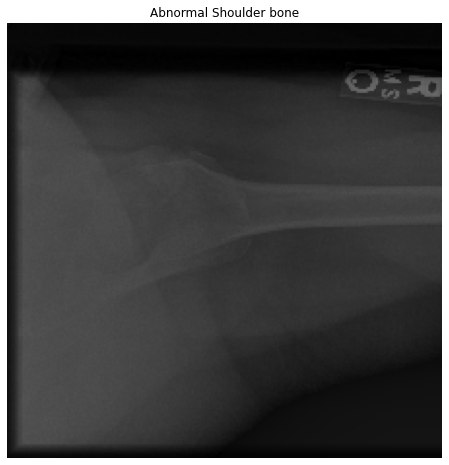

In [19]:
#Using Keras displaying the image1.png (Abnormal shoulder bone )
img_path = 'train/XR_SHOULDER/patient00001/study1_positive/image1.png'
img = image.load_img(img_path, target_size=(224, 224))
plt.figure(figsize=(8,8))
plt.axis('off')
plt.title('Abnormal Shoulder bone')
plt.imshow(img)

<font color ='teal'>Visulaising normal bone X-Ray Radiographs <font />

In [20]:
#Train_label column contains information about whether the bone is abnormal or normal
#if the train_label value is 1(the bone is abnormal) and if it is 0(the bone is normal)
#Store the data of normal cases in Normal dataframe
Normal = train_labelled[train_labelled['train_labels']==0]
print(Normal.shape)
print(Normal.head())

(8280, 2)
                                           train_path  train_labels
7   MURA-v1.1/train/XR_SHOULDER/patient00007/study...             0
53  MURA-v1.1/train/XR_SHOULDER/patient00051/study...             0
62  MURA-v1.1/train/XR_SHOULDER/patient00058/study...             0
81  MURA-v1.1/train/XR_SHOULDER/patient00074/study...             0
82  MURA-v1.1/train/XR_SHOULDER/patient00074/study...             0


Trying to visualize the image which path is available in first row of the dataframe.

In [21]:
path = train_image.loc[7,'train_path']
path

'MURA-v1.1/train/XR_SHOULDER/patient00003/study1_positive/image2.png'

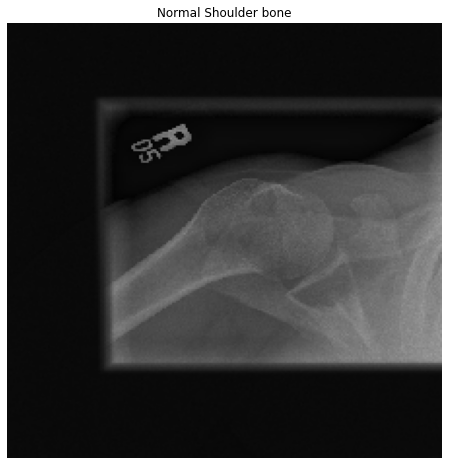

In [22]:
#Using Keras displaying the image1.png(Normal shoulder bone) 
img_path = 'train/XR_SHOULDER/patient00007/study2_negative/image2.png'
img = image.load_img(img_path, target_size=(224, 224))
plt.figure(figsize=(8,8))
plt.axis('off')
plt.title('Normal Shoulder bone')
plt.imshow(img)

<font color = 'teal'> Checking whether the dataframes have Imbalanced data <font />

# Abnormal and normal cases count in train_labelled dataframe

In [23]:
#the train_labelled dataframe contains two columns(image paths and the condition of bone )
#This dataframe contains details about indivudual patient(i.e., image path for indivudual patient)
#And it contains both abnormal and normal cases in same folder.
train_labels_counts =  train_labelled['train_labels'].value_counts()
train_labels_counts
print(train_labels_counts)

0    8280
1    5177
Name: train_labels, dtype: int64


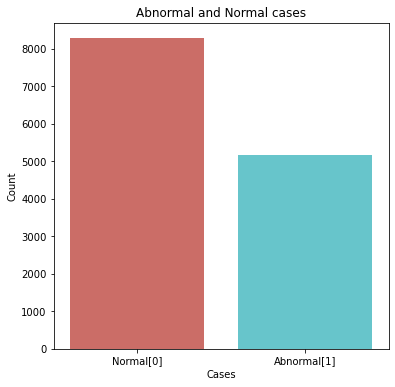

In [24]:
#Plotting the normal and abnormal count of train_labelled dataframe 
plt.figure(figsize=(6,6))
plt.title('Abnormal and Normal cases')
plt.xlabel('Cases')
plt.ylabel('Count')
sns.barplot(x= train_labels_counts.index,y = train_labels_counts.values,palette = 'hls')
plt.xticks(range(len(train_labels_counts.index)),['Normal[0]','Abnormal[1]'])
plt.show()

train_labelled dataframe is not labelled for each image. Actually the images are grouped for one patient in the dataset. Since it is not been labelled separately for each image, its better to consider train_image as training dataset.

# Abnormal and normal cases count in valid_labelled dataframe

In [25]:
#the valid_labelled dataframe contains two columns(image paths and the condition of bone )
#This dataframe contains details about indivudual patient(i.e., image path for indivudual patient)
#And it contains both abnormal and normal cases in same folder.
valid_labels_counts =  valid_labelled['valid_labels'].value_counts()
valid_labels_counts
print(valid_labels_counts)

0    661
1    538
Name: valid_labels, dtype: int64


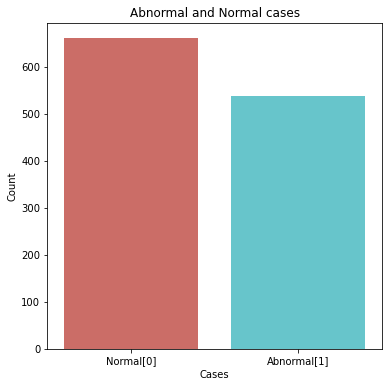

In [26]:
#Plotting the normal and abnormal count of valid_labelled dataframe 
plt.figure(figsize=(6,6))
plt.title('Abnormal and Normal cases')
plt.xlabel('Cases')
plt.ylabel('Count')
sns.barplot(x= valid_labels_counts.index,y = valid_labels_counts.values,palette = 'hls')
plt.xticks(range(len(valid_labels_counts.index)),['Normal[0]','Abnormal[1]'])
plt.show()

valid_labelled dataframe is not labelled for each image. Actually the images are grouped for one patient in this dataset same as train_labelled dataframe. Since it is not been labelled separately for each image, its better to take valid_image as validating dataset.

# Abnormal and Normal cases count in train_image dataframe 

Creating a column train_labels based 

In [27]:
#Defining the function labelling_train which creates a column train_labels containing the info about bone anormality
def labelling_train(train_image):
    #Iterating through train_image['train_image']
    for i in range(len(train_image['train_path'])):
        #if path of the image contains positive in it , storing 1 in train_label column 
        if ('positive' in train_image.loc[i,'train_path']):
            train_image.loc[i,'train_labels'] = 1
        else:
            train_image.loc[i,'train_labels'] = 0

In [28]:
# calling the function labelling by passing the dataframe train_image in it
labelling_train(train_image)

In [29]:
#Print the first five rows of train_image 
print(train_image.head())

                                          train_path  train_labels
0  MURA-v1.1/train/XR_SHOULDER/patient00001/study...           1.0
1  MURA-v1.1/train/XR_SHOULDER/patient00001/study...           1.0
2  MURA-v1.1/train/XR_SHOULDER/patient00001/study...           1.0
3  MURA-v1.1/train/XR_SHOULDER/patient00002/study...           1.0
4  MURA-v1.1/train/XR_SHOULDER/patient00002/study...           1.0


In [30]:
train_image_counts =  train_image['train_labels'].value_counts()
train_image_counts
print(train_image_counts)


0.0    21935
1.0    14873
Name: train_labels, dtype: int64


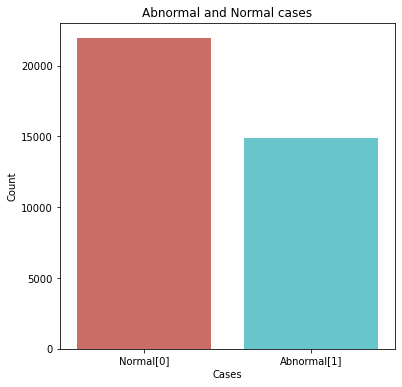

In [31]:
plt.figure(figsize=(6,6))
plt.title('Abnormal and Normal cases')
plt.xlabel('Cases')
plt.ylabel('Count')
sns.barplot(x= train_image_counts.index,y = train_image_counts.values,palette = 'hls')
plt.xticks(range(len(train_image_counts.index)),['Normal[0]','Abnormal[1]'])
plt.show()

The training dataframe contains balanced sets of abnormal and normal X-Ray images. It is not a imbalanced dataset

# Abnormal and normal cases count in valid_image dataframe

In [32]:
#Defining the function labelling_valid which creates a column train_labels containing the info about bone anormality
def labelling_valid(valid_image):
    for i in range(len(valid_image['valid_path'])):
        if ('positive' in valid_image.loc[i,'valid_path']):
            valid_image.loc[i,'valid_labels'] = 1
        else:
            valid_image.loc[i,'valid_labels'] = 0

In [33]:
#Calling function labelling_valid
labelling_valid(valid_image)

In [34]:
print(valid_image.head())

                                          valid_path  valid_labels
0  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...           1.0
1  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...           1.0
2  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...           1.0
3  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...           1.0
4  MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...           1.0


In [36]:
valid_image_counts =  valid_image['valid_labels'].value_counts()
valid_image_counts
print(valid_image_counts)


0.0    1667
1.0    1530
Name: valid_labels, dtype: int64


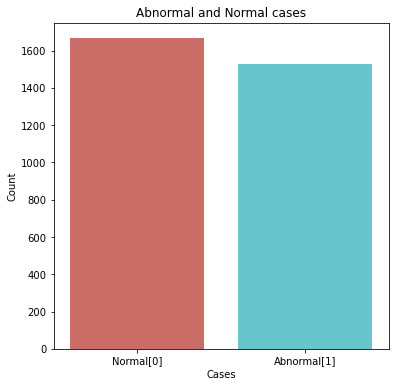

In [37]:
plt.figure(figsize=(6,6))
plt.title('Abnormal and Normal cases')
plt.xlabel('Cases')
plt.ylabel('Count')
sns.barplot(x= valid_image_counts.index,y = valid_image_counts.values,palette = 'hls')
plt.xticks(range(len(valid_image_counts.index)),['Normal[0]','Abnormal[1]'])
plt.show()

The validating dataframe contains balanced sets of abnormal and normal X-Ray images. It is not a imbalanced dataset

#  Count of X-Rays of indivudual body parts from training dataset

In [38]:
#Counting the indivudual part X-Rays and storing it in a separate column 'body_part_and_condition'
def train_count_XRays(train_image):
    for i in range(len(train_image['train_path'])):
        if (("SHOULDER" in train_image.loc[i,'train_path'])) :
            train_image.loc[i,'body_part'] = 'shoulder'   
        elif (("SHOULDER" in train_image.loc[i,'train_path'])) :
            train_image.loc[i,'body_part'] = 'shoulder'           
        elif (("WRIST" in train_image.loc[i,'train_path']) ):
            train_image.loc[i,'body_part'] = 'WRIST'
        elif (("WRIST" in train_image.loc[i,'train_path']) ):
            train_image.loc[i,'body_part'] = 'WRIST'     
        elif (("FOREARM" in train_image.loc[i,'train_path']) ):
            train_image.loc[i,'body_part'] = 'FOREARM'
        elif (("FOREARM" in train_image.loc[i,'train_path'])):
            train_image.loc[i,'body_part'] = 'FOREARM'
        elif (("HAND" in train_image.loc[i,'train_path']) ):
            train_image.loc[i,'body_part'] = 'HAND'
        elif (("HAND" in train_image.loc[i,'train_path']) ):
            train_image.loc[i,'body_part'] = 'HAND'  
        elif (("HUMERUS" in train_image.loc[i,'train_path']) ):
            train_image.loc[i,'body_part'] = 'HUMERUS'
        elif (("HUMERUS" in train_image.loc[i,'train_path'])):
            train_image.loc[i,'body_part'] = 'HUMERUS'           
        elif (("FINGER" in train_image.loc[i,'train_path'])):
            train_image.loc[i,'body_part'] = 'FINGER'            
        elif (("FINGER" in train_image.loc[i,'train_path'])):
            train_image.loc[i,'body_part'] = 'FINGER'                        
        elif (("ELBOW" in train_image.loc[i,'train_path'])):
            train_image.loc[i,'body_part'] = 'ELBOW'            
        elif (("ELBOW" in train_image.loc[i,'train_path'])) :
            train_image.loc[i,'body_part'] = 'ELBOW'            

In [39]:
#Call the function count_XRays to find the indivudual part X-Rays by passing the training dataframe as argument
train_count_XRays(train_image)

In [40]:
train_image.head()

,train_path,train_labels,body_part
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1.0,shoulder
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1.0,shoulder
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1.0,shoulder
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1.0,shoulder
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1.0,shoulder


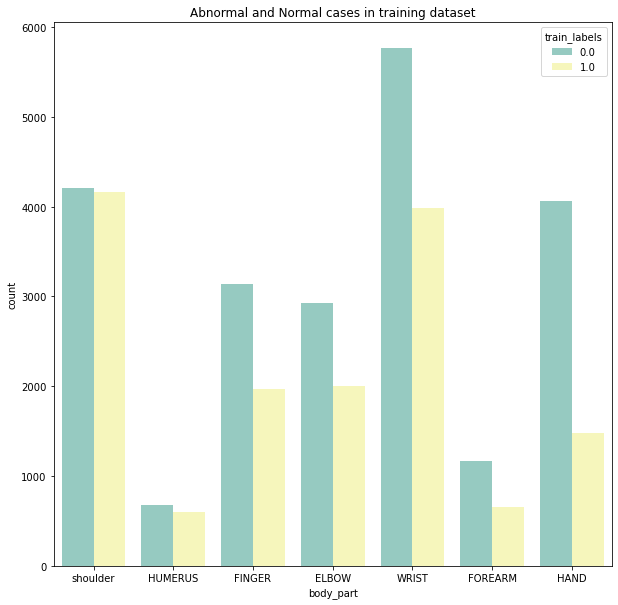

In [41]:
plt.figure(figsize=(10,10))
plt.title('Abnormal and Normal cases in training dataset')
plt.xlabel('Cases')
plt.ylabel('Count')
sns.countplot(x="body_part", hue="train_labels", data=train_image,palette="Set3")
plt.show()

Even if consider  x-rays of body parts separately, the abnormal and normal cases are somewhat balanced in training datasets.

# Count of X-Rays of indivudual body parts from validating dataset

In [42]:
#Counting the indivudual part X-Rays and storing it in a separate column 'body_part_and_condition'
def valid_count_XRays(valid_image):
    for i in range(len(valid_image['valid_path'])):
        if (("SHOULDER" in valid_image.loc[i,'valid_path']) ):
            valid_image.loc[i,'body_part'] = 'shoulder'            
        elif (("SHOULDER" in valid_image.loc[i,'valid_path']) ):
            valid_image.loc[i,'body_part'] = 'shoulder'                                                            
        elif (("WRIST" in valid_image.loc[i,'valid_path']) ):
            valid_image.loc[i,'body_part'] = 'WRIST'           
        elif (("WRIST" in valid_image.loc[i,'valid_path']) ):
            valid_image.loc[i,'body_part'] = 'WRIST'                                                            
        elif (("FOREARM" in valid_image.loc[i,'valid_path']) ):
            valid_image.loc[i,'body_part'] = 'FOREARM'           
        elif (("FOREARM" in valid_image.loc[i,'valid_path'])):
            valid_image.loc[i,'body_part'] = 'FOREARM'                                   
        elif (("HAND" in valid_image.loc[i,'valid_path'])):
            valid_image.loc[i,'body_part'] = 'HAND'            
        elif (("HAND" in valid_image.loc[i,'valid_path']) ):
            valid_image.loc[i,'body_part'] = 'HAND'                                           
        elif (("HUMERUS" in valid_image.loc[i,'valid_path'])):
            valid_image.loc[i,'body_part'] = 'HUMERUS'            
        elif (("HUMERUS" in valid_image.loc[i,'valid_path'])):
            valid_image.loc[i,'body_part'] = 'HUMERUS'                                    
        elif (("FINGER" in valid_image.loc[i,'valid_path']) ):
            valid_image.loc[i,'body_part'] = 'FINGER'            
        elif (("FINGER" in valid_image.loc[i,'valid_path']) ):
            valid_image.loc[i,'body_part'] = 'FINGER'                                    
        elif (("ELBOW" in valid_image.loc[i,'valid_path']) ):
            valid_image.loc[i,'body_part'] = 'ELBOW'            
        elif (("ELBOW" in valid_image.loc[i,'valid_path']) ):
            valid_image.loc[i,'body_part'] = 'ELBOW'            

In [43]:
valid_count_XRays(valid_image)

In [44]:
valid_image.head()

,valid_path,valid_labels,body_part
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1.0,WRIST
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1.0,WRIST
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1.0,WRIST
3,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1.0,WRIST
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,1.0,WRIST


Plotting the abnormal and normal cases count from validating dataset

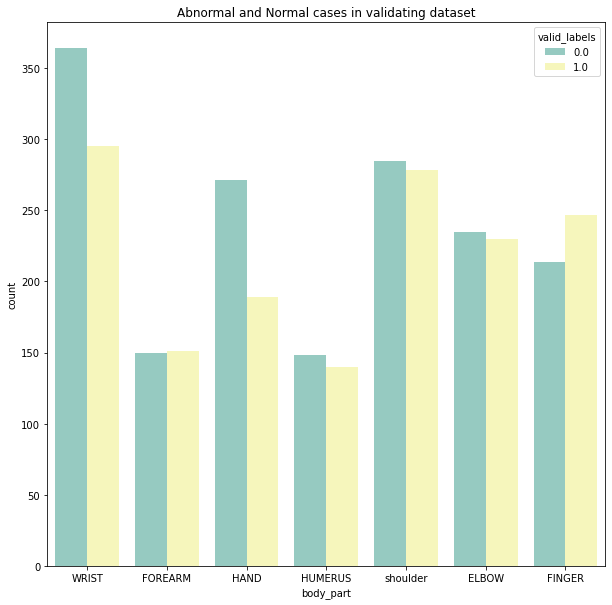

In [45]:
plt.figure(figsize=(10,10))
plt.title('Abnormal and Normal cases in validating dataset')
plt.xlabel('Cases')
plt.ylabel('Count')
sns.countplot(x="body_part", hue="valid_labels", data=valid_image,palette="Set3")
plt.show()

In validating dataset the count of abnormal and normal are balanced if we consider x-rays of body parts separately.